In [1]:
import pandas
import os
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import numpy as np

%matplotlib inline

## read in the data and preliminary visualization

In [2]:
ex2data1, _ = urlretrieve('https://gist.githubusercontent.com/cchio/b433e302da7aa1f2fd73b7cff890cc54/raw/f0087ce58c77aa279fbb58b4a3ee72ea0c3f9401/ex2data1')
ex2data2, _ = urlretrieve('https://gist.githubusercontent.com/cchio/71628ddb1ac3c9765bb1bb0bd4a12007/raw/71ce61229de19b398899081a2706651a85ab5cd8/ex2data2')

In [3]:
df = pandas.read_csv(ex2data2, names=['x','y','label'], index_col=False)

In [4]:
df.head(10)

,x,y,label
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [5]:
df.tail()

,x,y,label
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [6]:
df.describe()

,x,y,label
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [7]:
len(df)

118

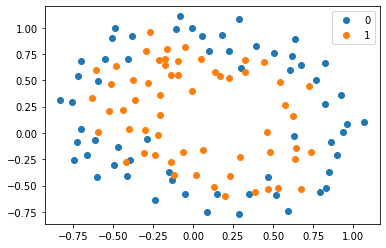

In [8]:

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
ax.legend()

plt.show()

## train a classifier from scratch - Naive Bayes

In [9]:
# get the data into arrays since that is what scikit expects
feature_cols = ['x','y']

X = df[feature_cols].values
y = df['label'].values



In [10]:
X, y

(array([[ 0.051267 ,  0.69956  ],
        [-0.092742 ,  0.68494  ],
        [-0.21371  ,  0.69225  ],
        [-0.375    ,  0.50219  ],
        [-0.51325  ,  0.46564  ],
        [-0.52477  ,  0.2098   ],
        [-0.39804  ,  0.034357 ],
        [-0.30588  , -0.19225  ],
        [ 0.016705 , -0.40424  ],
        [ 0.13191  , -0.51389  ],
        [ 0.38537  , -0.56506  ],
        [ 0.52938  , -0.5212   ],
        [ 0.63882  , -0.24342  ],
        [ 0.73675  , -0.18494  ],
        [ 0.54666  ,  0.48757  ],
        [ 0.322    ,  0.5826   ],
        [ 0.16647  ,  0.53874  ],
        [-0.046659 ,  0.81652  ],
        [-0.17339  ,  0.69956  ],
        [-0.47869  ,  0.63377  ],
        [-0.60541  ,  0.59722  ],
        [-0.62846  ,  0.33406  ],
        [-0.59389  ,  0.005117 ],
        [-0.42108  , -0.27266  ],
        [-0.11578  , -0.39693  ],
        [ 0.20104  , -0.60161  ],
        [ 0.46601  , -0.53582  ],
        [ 0.67339  , -0.53582  ],
        [-0.13882  ,  0.54605  ],
        [-0.29

In [11]:
# train a classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
trained_classifier = classifier.fit(X,y)
trained_classifier


GaussianNB()

In [12]:
# make some predictions
y_predict = trained_classifier.predict(X)

y_predict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
df['predict'] = y_predict
df


,x,y,label,predict
0,0.051267,0.699560,1,1
1,-0.092742,0.684940,1,1
2,-0.213710,0.692250,1,1
3,-0.375000,0.502190,1,1
4,-0.513250,0.465640,1,1
...,...,...,...,...
113,-0.720620,0.538740,0,0
114,-0.593890,0.494880,0,0
115,-0.484450,0.999270,0,0
116,-0.006336,0.999270,0,0


In [14]:
# see how good we did?
print("Number of mislabeled points out of a total %d points : %d"
      % (len(y),sum(y != y_predict)))




Number of mislabeled points out of a total 118 points : 30


In [15]:
(118-30)/118

0.7457627118644068

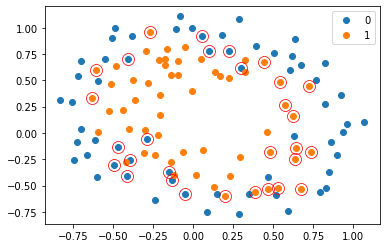

In [16]:
# can we figure out which ones didnt match prediction

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
ax.legend()

bad_filter = df.label != df.predict
df_bad = df[bad_filter]
ax.plot(df_bad.x, df_bad.y, "ro", ms=12, mew=.75, markerfacecolor="None", markeredgecolor='red', linestyle='')

plt.show()



## define some helper routines

In [17]:
def training_data_from_dataframe(df, feature_cols, label_col='label'):
    X = df[feature_cols].values
    y = df[label_col].values
    
    return X,y

In [18]:
from sklearn.preprocessing import StandardScaler
def scale_features(X):

    scaler = StandardScaler()
    scaler.fit(X)  # Don't cheat - fit only on training data
    return scaler.transform(X)

def scaled_data_from_dataframe(df, feature_cols, label_col='label'):
    X,y = training_data_from_dataframe(df, feature_cols, label_col)
    X_scaled = scale_features(X)
    return X_scaled, y

In [19]:
def train_classifer(classifier, df, feature_cols, label_col='label'):
    X,y = training_data_from_dataframe(df, feature_cols)
    trained_classifier = classifier.fit(X,y) 
    return trained_classifier

In [20]:
def classifier_predict(trained_classifer, df, feature_cols, label_col='label'):
    X,y = training_data_from_dataframe(df, feature_cols)
    y_predict = trained_classifier.predict(X)
    df['predict'] = y_predict
    accuracy = 1. * sum(y == y_predict) / len(y)
    return accuracy
    

In [21]:
def classifier_decision_boundary(trained_classifier, df, feature_cols):
    f_range = list()
    for ff in feature_cols:
        f_min = df[ff].min()
        f_max = df[ff].max()
        f_step = (f_max - f_min) / 100.
        f_range.append( (f_min, f_max, f_step) )
        
    xx, yy = np.mgrid[f_range[0][0]:f_range[0][1]:f_range[0][2], f_range[1][0]:f_range[1][1]:f_range[1][2]]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = trained_classifier.predict_proba(grid)[:, 1].reshape(xx.shape)  
    return(xx,yy,probs)

In [22]:
def plot_predict(df, trained_classifier=None, feature_cols=None):
       
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    
    groups = df.groupby('label')
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
        
    bad_filter = df.label != df.predict
    df_bad = df[bad_filter]
    ax.plot(df_bad.x, df_bad.y, "ro", ms=12, mew=.75, markerfacecolor="None", markeredgecolor='red', linestyle='')

    if trained_classifier is not None:
        try:
            (xx,yy,probs) = classifier_decision_boundary(trained_classifier, df, feature_cols)
            ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1)
        except:
            pass
    ax.legend()


#fig = plot_predict(df, trained_classifier, feature_cols)


## naive bayes

In [23]:
?GaussianNB

In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.naive_bayes import GaussianNB

feature_cols = ['x','y']
X,y = training_data_from_dataframe(df, feature_cols)

classifier = GaussianNB()
trained_classifier = classifier.fit(X,y)
y_predict = trained_classifier.predict(X)
df['predict'] = y_predict

print("Number of mislabeled points out of a total %d points : %d"
      % (len(y),sum(y != y_predict)))



Number of mislabeled points out of a total 118 points : 30


In [26]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

training accuracy =  0.7457627118644068


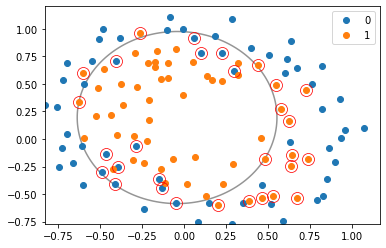

In [27]:
# visiualize training error
print ("training accuracy = ", classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

## logistic regression

training accuracy =  0.5423728813559322


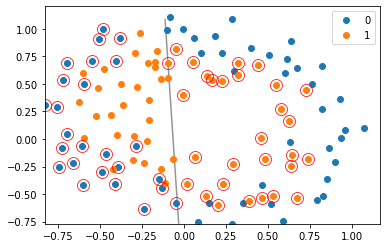

In [28]:
feature_cols = ['x','y']

from sklearn import linear_model

classifier = linear_model.LogisticRegression()
trained_classifier = train_classifer(classifier, df, feature_cols)
print ("training accuracy = ", classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

## support vector machines (SVM)

0.5508474576271186


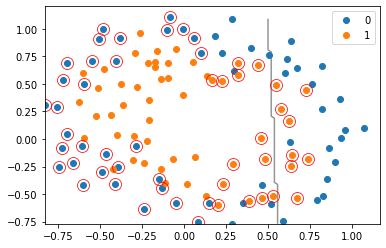

In [29]:
#linear SVM
feature_cols = ['x','y']
from sklearn import svm

classifier = svm.SVC(kernel='linear', probability=True)
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

0.6610169491525424


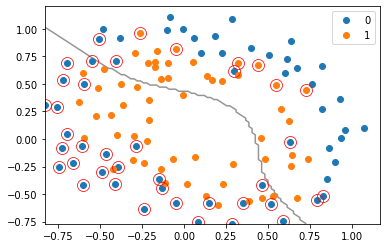

In [30]:
#polynomial SVM
feature_cols = ['x','y']
from sklearn import svm

classifier = svm.SVC(kernel='poly', probability=True)
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

0.847457627118644


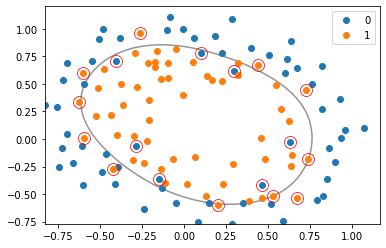

In [31]:
# rbf kernel for SVM

feature_cols = ['x','y']
from sklearn import svm

classifier = svm.SVC(kernel='rbf', probability=True)
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

In [32]:
?svm.SVC

## stochastic gradient descent (SGD)

0.3983050847457627


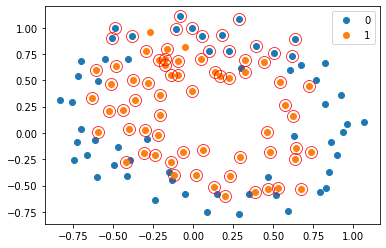

In [33]:
from sklearn import linear_model
classifier = linear_model.SGDClassifier(loss='hinge',  penalty="l2")

trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)

## perceptron

0.5084745762711864


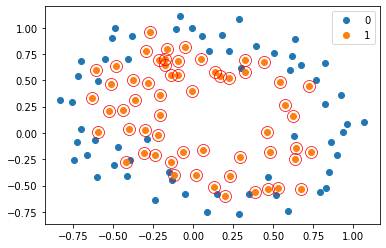

In [34]:
from sklearn import linear_model
classifier = linear_model.Perceptron()
trained_classifier = train_classifer(classifier, df, feature_cols)
print (classifier_predict(trained_classifier, df, feature_cols))
plot_predict(df, trained_classifier, feature_cols)
